In [17]:
import os
from typing import Tuple
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision.io.image import read_image
from torchvision.transforms import v2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
from data.coco_dataset import COCODataset, USED_CATEGORIES

In [4]:
ds = COCODataset("./datasets/COCO2014", sup_cats=USED_CATEGORIES)
len(ds)

loading annotations into memory...
Done (t=3.59s)
creating index...
index created!


36391

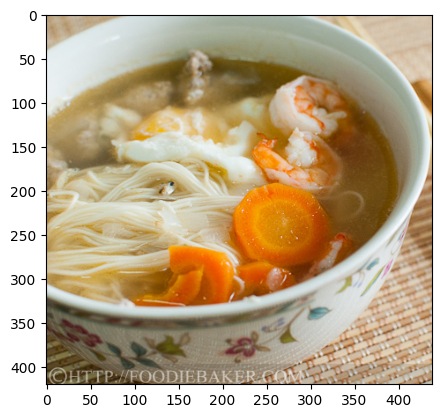

In [14]:
plt.imshow(ds[1][0].permute(1, 2, 0))

In [15]:
mask = ds[1][1]

In [18]:
sj = v2.ScaleJitter(198, (.5, 1.5))

In [19]:
plt.imshow(sj(mask))

TypeError: No image, video, mask or bounding box was found in the sample

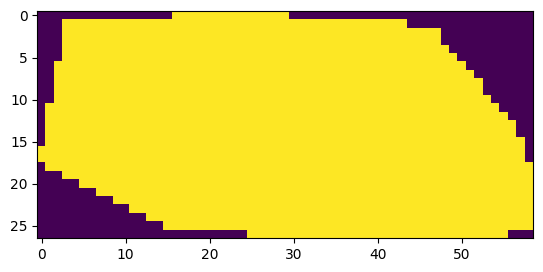

In [11]:
plt.imshow(ds[1][1])

In [8]:
from pycocotools.coco import COCO

In [9]:
coco = COCO("./datasets/COCO2014/annotations2014/annotations/instances_val2014.json")

loading annotations into memory...
Done (t=3.92s)
creating index...
index created!


In [25]:
coco.getCatIds(supNms=["accessory", "electronic"])

[27, 28, 31, 32, 33, 72, 73, 74, 75, 76, 77]

In [27]:
coco.getImgIds(catIds=[27, 28, 72, 77])

[]

In [10]:
img = coco.imgs[74]


In [11]:
img["file_name"]

'COCO_val2014_000000000074.jpg'

In [24]:
from PIL import Image

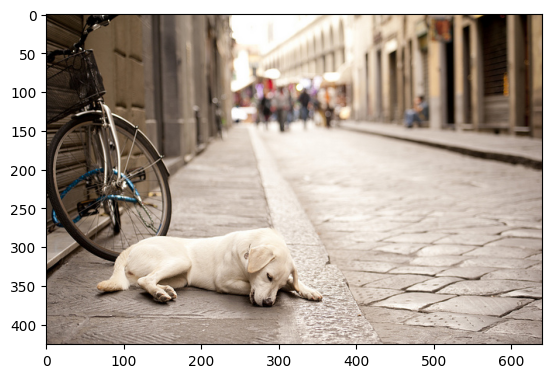

In [25]:
plt.imshow(Image.open(os.path.join("./datasets/COCO2014/val2014/val2014", img["file_name"])))

In [65]:
cat_ids = coco.getCatIds(supNms=["outdoor", "animal", "accessory", "sports", "kitchen", "food", "furniture", "electronic", "appliance", "indoor"])

In [66]:
len(cat_ids)

71

In [29]:
anns_id = coco.getAnnIds(imgIds=img["id"], catIds=cat_ids, iscrowd=None)

In [30]:
anns_id

[1774, 128367, 195946, 253933, 1225755, 1733076, 1747768, 1751664]

In [31]:
anns = coco.loadAnns(anns_id)

In [32]:
anns

[{'segmentation': [[321.02,
    321.0,
    314.25,
    307.99,
    307.49,
    293.94,
    300.2,
    286.14,
    290.84,
    277.81,
    285.11,
    276.25,
    267.94,
    277.81,
    256.49,
    279.89,
    244.52,
    281.97,
    227.35,
    287.18,
    192.49,
    290.3,
    168.55,
    289.26,
    142.53,
    287.18,
    121.72,
    293.42,
    105.07,
    303.83,
    94.14,
    313.2,
    86.33,
    326.73,
    84.25,
    339.22,
    76.97,
    343.9,
    67.6,
    345.46,
    61.87,
    350.66,
    69.16,
    360.03,
    77.49,
    360.03,
    93.62,
    358.99,
    105.07,
    356.91,
    110.27,
    351.7,
    117.55,
    353.79,
    121.2,
    352.74,
    132.64,
    361.07,
    139.41,
    367.32,
    145.89,
    373.77,
    156.05,
    374.5,
    160.41,
    370.14,
    167.67,
    367.96,
    168.39,
    370.87,
    169.84,
    362.88,
    166.94,
    356.35,
    177.83,
    353.45,
    190.89,
    353.45,
    209.54,
    358.32,
    224.96,
    360.09,
    240.82,
    36

In [34]:
mask = coco.annToMask(anns[1])

In [35]:
mask.max()

1

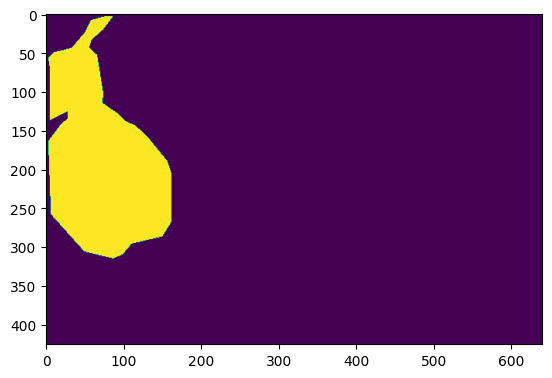

In [36]:
plt.imshow(mask)